# 4 章　多変数関数の微分


In [1]:
# 必要ライブラリの宣言
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def L(u, v):
    return 3 * u**2 + 3 * v**2 - u*v + 7*u - 7*v + 10

In [3]:
def Lu(u, v):
    return 6 * u - v + 7

In [4]:
def Lv(u, v):
    return -u + 6 * v - 7

In [5]:
L(-1, 1)

3

In [6]:
L(0, 2)

8

In [7]:
Lu(0, 0)

7

In [8]:
Lv(0, 0)

-7

# 切断面グラフ


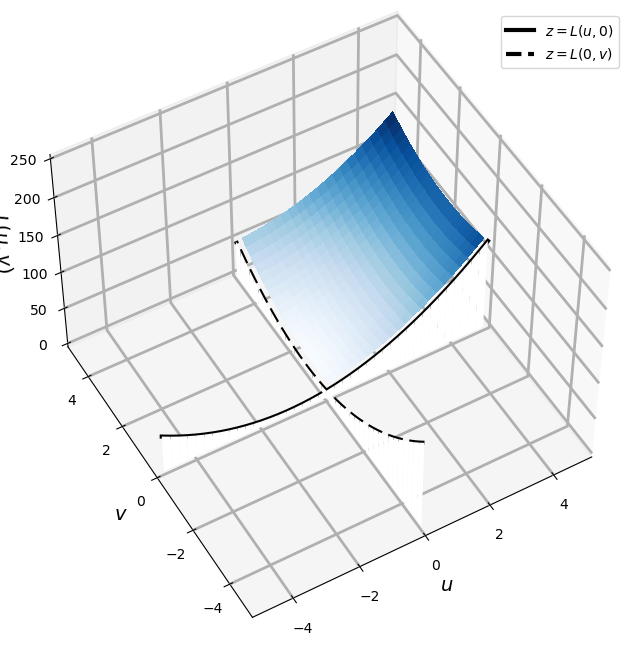

In [9]:
# fig04-04

u = np.linspace(0.2, 5, 21)
v = np.linspace(0.2, 5, 21)
U, V = np.meshgrid(u, v)
Z = L(U, V)
uu = np.linspace(-5, 5, 41)
vv = np.linspace(-5, 5, 41)
zz = np.zeros(uu.shape)
Luu = L(uu, zz)
Lvv = L(zz, vv)
uu2 = np.vstack((uu, uu))
vv2 = np.vstack((vv, vv))
zz2 = np.vstack((zz, zz))
Luu2 = np.vstack((Luu, zz))
Lvv2 = np.vstack((Lvv, zz))

# 関数グラフのみ
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 250)
ax.view_init(50, 240)
ax.set_xlabel('$u$', fontsize=14)
ax.set_ylabel('$v$', fontsize=14)
ax.set_zlabel('$L(u,v)$', fontsize=14)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.plot_surface(U, V, Z, rstride=1, cstride=1, cmap='Blues',
                linewidth=0, shade=False, antialiased=False)
ax.plot_surface(uu2, zz2, Luu2, color='white', linewidth=0, shade=False)
ax.plot_surface(zz2, vv2, Lvv2, color='white', linewidth=0, shade=False)
ax.plot3D(uu, zz, Luu, c='k', lw=3, linestyle='-', label='$z = L(u, 0)$')
ax.plot3D(zz, vv, Lvv, c='k', lw=3, linestyle='--', label='$z = L(0, v)$')
ax.legend()
plt.show()

# 勾配降下法


In [10]:
u = np.linspace(-5, 5, 501)
v = np.linspace(-5, 5, 501)

In [11]:
U, V = np.meshgrid(u, v)
Z = L(U, V)

In [12]:
# 勾配降下法のシミュレーション
W = np.array([4.0, 4.0])
W1 = [W[0]]
W2 = [W[1]]
N = 21
alpha = 0.05
for i in range(N):
    W = W - alpha * np.array([Lu(W[0], W[1]), Lv(W[0], W[1])])
    W1.append(W[0])
    W2.append(W[1])

## 関数グラフ


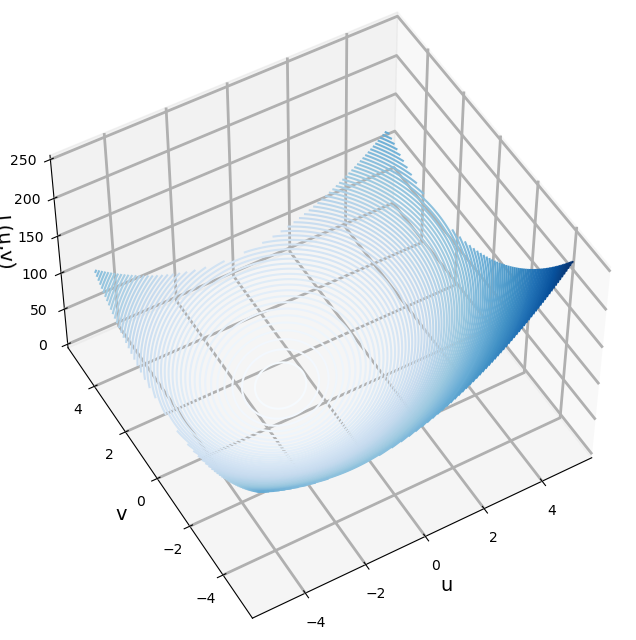

In [13]:
n_loop = 0
# 関数グラフのみ
# fig04-03 左

WW1 = np.array(W1[:n_loop])
WW2 = np.array(W2[:n_loop])
ZZ = L(WW1, WW2)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 250)
ax.view_init(50, 240)
ax.set_xlabel('u', fontsize=14)
ax.set_ylabel('v', fontsize=14)
ax.set_zlabel('L(u,v)', fontsize=14)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.contour3D(U, V, Z, 100, cmap='Blues', alpha=1.0)
# ax.plot_surface(U, V, Z,  cmap='Blues', linewidth=0)
plt.show()

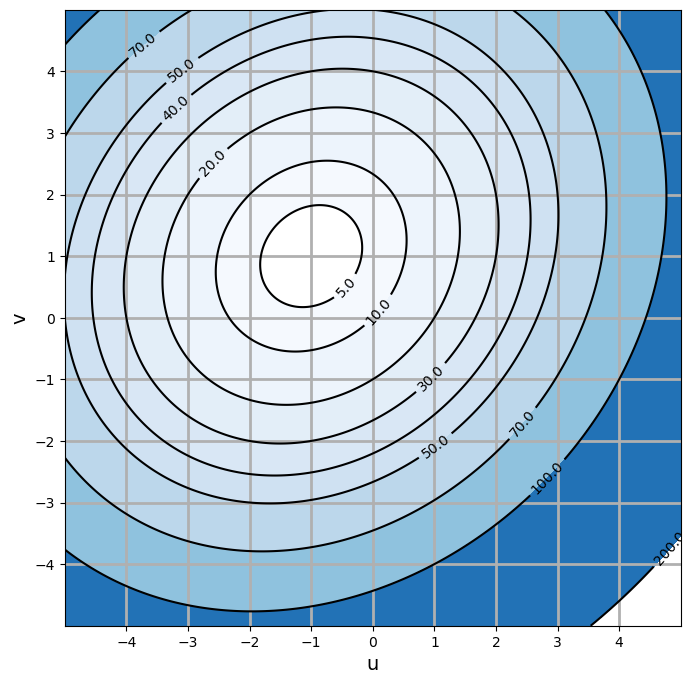

In [14]:
# 関数グラフのみ
# fig04-03 右

plt.figure(figsize=(8, 8))
plt.contourf(U, V, Z, levels=[5, 10, 20, 30, 40,
             50, 70, 100, 200], cmap='Blues')
C = plt.contour(U, V, Z, levels=[5, 10, 20, 30,
                40, 50, 70, 100, 200], colors='k')
plt.clabel(C, inline=1, fontsize=10, fmt='%r')
plt.gca().set_aspect('equal')
plt.xticks(range(-4, 5, 1))
plt.yticks(range(-4, 5, 1))
plt.xlabel('u', fontsize=14)
plt.ylabel('v', fontsize=14)
plt.grid(linewidth=2)
plt.show()

# 初期状態


In [15]:
n_loop = 1

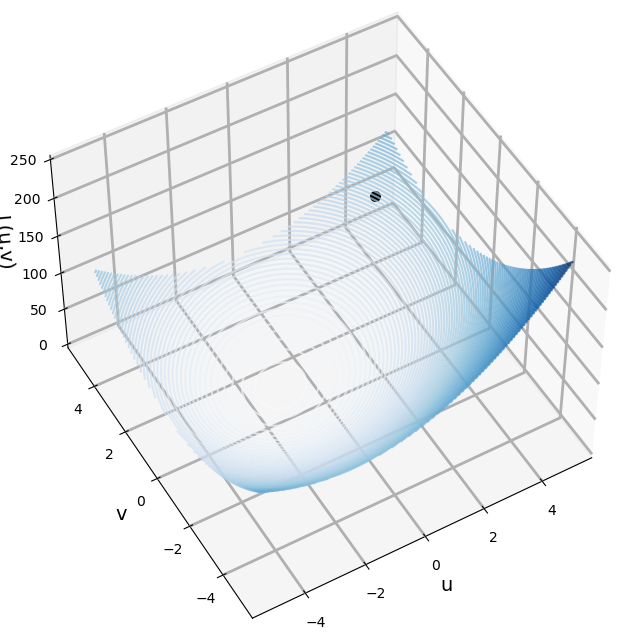

In [16]:
# fig-04-07-1
WW1 = np.array(W1[:n_loop])
WW2 = np.array(W2[:n_loop])
ZZ = L(WW1, WW2)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 250)
ax.set_xlabel('u', fontsize=14)
ax.set_ylabel('v', fontsize=14)
ax.set_zlabel('L(u,v)', fontsize=14)
ax.view_init(50, 240)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.contour3D(U, V, Z, 100, cmap='Blues', alpha=0.7)
ax.plot3D(WW1, WW2, ZZ, 'o-', c='k', alpha=1, markersize=7)
plt.show()

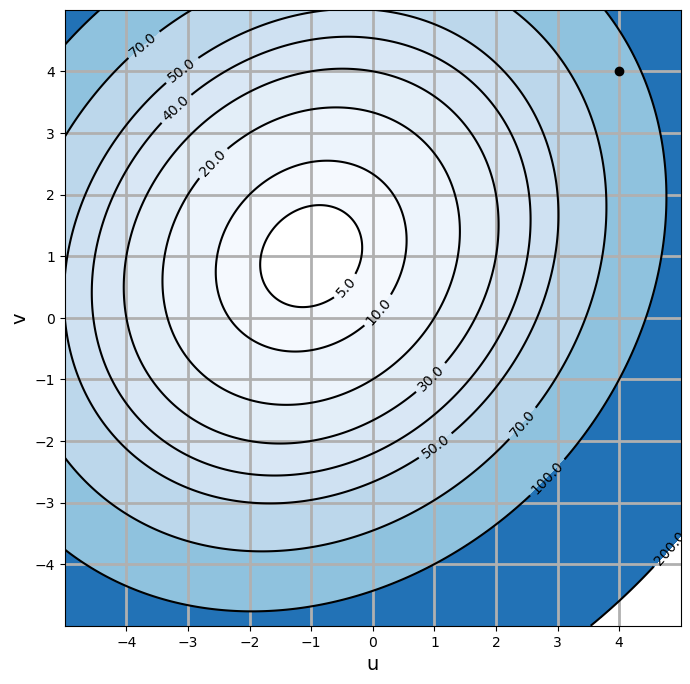

In [17]:
# fig04-07-2
plt.figure(figsize=(8, 8))
plt.contourf(U, V, Z, levels=[5, 10, 20, 30, 40,
             50, 70, 100, 200], cmap='Blues')
C = plt.contour(U, V, Z, levels=[5, 10, 20, 30,
                40, 50, 70, 100, 200], colors='k')
plt.clabel(C, inline=1, fontsize=10, fmt='%r')
plt.gca().set_aspect('equal')
plt.plot(W1[:n_loop], W2[:n_loop], '-o', c='k')
plt.xticks(range(-4, 5, 1))
plt.yticks(range(-4, 5, 1))
plt.xlabel('u', fontsize=14)
plt.ylabel('v', fontsize=14)
plt.grid(linewidth=2)
plt.show()

# 第 1 ステップ


In [18]:
n_loop = 2

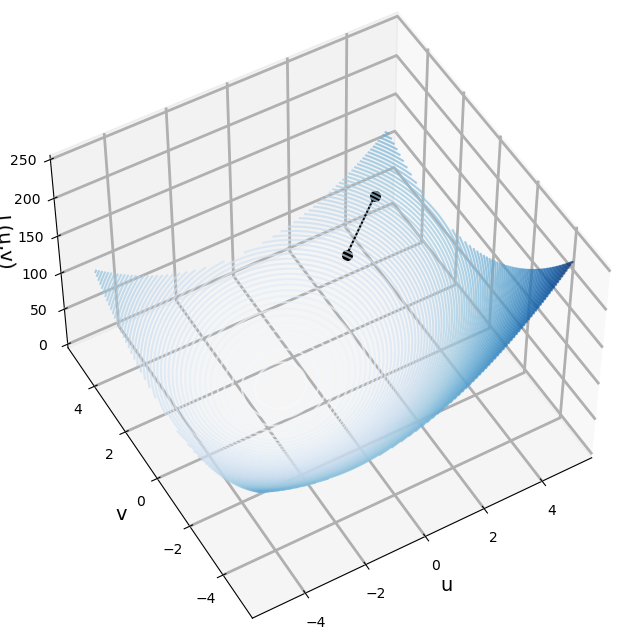

In [19]:
# fig04-08-1
WW1 = np.array(W1[:n_loop])
WW2 = np.array(W2[:n_loop])
ZZ = L(WW1, WW2)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 250)
ax.set_xlabel('u', fontsize=14)
ax.set_ylabel('v', fontsize=14)
ax.set_zlabel('L(u,v)', fontsize=14)
ax.view_init(50, 240)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.contour3D(U, V, Z, 100, cmap='Blues', alpha=0.7)
ax.plot3D(WW1, WW2, ZZ, 'o-', c='k', alpha=1, markersize=7)
plt.show()

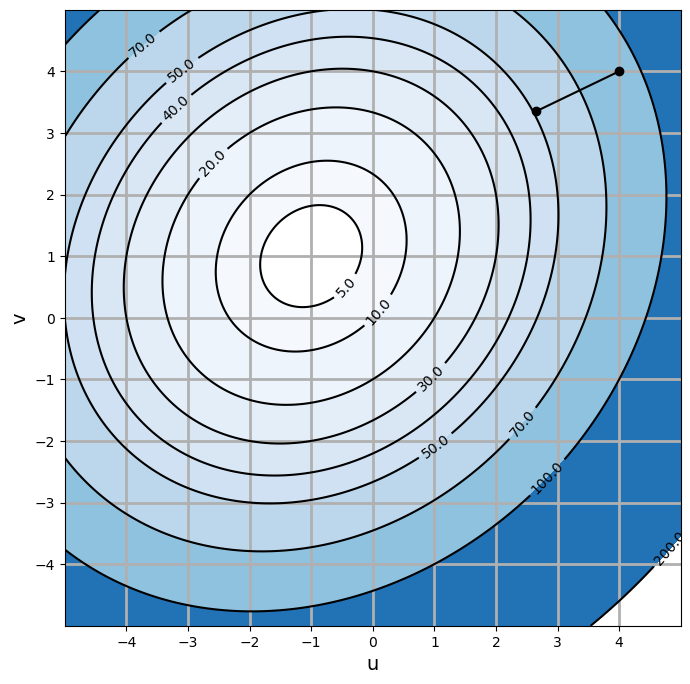

In [20]:
# fig04-08-2
plt.figure(figsize=(8, 8))
plt.contourf(U, V, Z, levels=[5, 10, 20, 30, 40,
             50, 70, 100, 200], cmap='Blues')
C = plt.contour(U, V, Z, levels=[5, 10, 20, 30,
                40, 50, 70, 100, 200], colors='k')
plt.clabel(C, inline=1, fontsize=10, fmt='%r')
plt.plot(W1[:n_loop], W2[:n_loop], '-o', c='k')
plt.gca().set_aspect('equal')
plt.xticks(range(-4, 5, 1))
plt.yticks(range(-4, 5, 1))
plt.xlabel('u', fontsize=14)
plt.ylabel('v', fontsize=14)
plt.grid(linewidth=2)
plt.show()

# step5


In [21]:
n_loop = 6

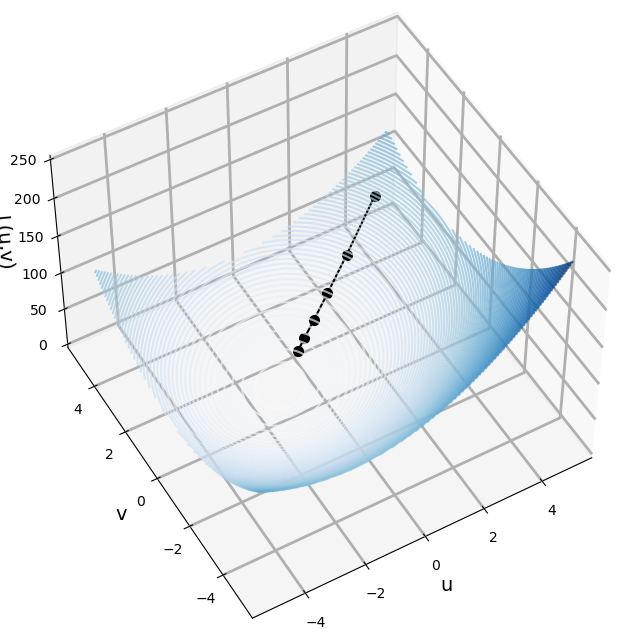

In [22]:
# fig04-09-1
WW1 = np.array(W1[:n_loop])
WW2 = np.array(W2[:n_loop])
ZZ = L(WW1, WW2)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 250)
ax.set_xlabel('u', fontsize=14)
ax.set_ylabel('v', fontsize=14)
ax.set_zlabel('L(u,v)', fontsize=14)
ax.view_init(50, 240)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.contour3D(U, V, Z, 100, cmap='Blues', alpha=0.7)
ax.plot3D(WW1, WW2, ZZ, 'o-', c='k', alpha=1, markersize=7)
plt.show()

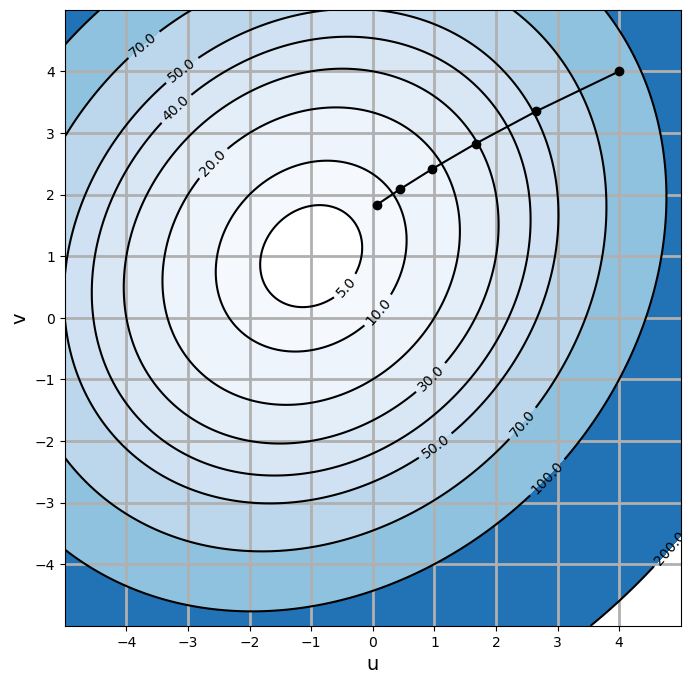

In [23]:
# fig04-09-2
plt.figure(figsize=(8, 8))
plt.contourf(U, V, Z, levels=[5, 10, 20, 30, 40,
             50, 70, 100, 200], cmap='Blues')
C = plt.contour(U, V, Z, levels=[5, 10, 20, 30,
                40, 50, 70, 100, 200], colors='k')
plt.clabel(C, inline=1, fontsize=10, fmt='%r')
plt.plot(W1[:n_loop], W2[:n_loop], '-o', c='k')
plt.gca().set_aspect('equal')
plt.xticks(range(-4, 5, 1))
plt.yticks(range(-4, 5, 1))
plt.xlabel('u', fontsize=14)
plt.ylabel('v', fontsize=14)
plt.grid(linewidth=2)
plt.show()

# step20


In [24]:
n_loop = 21

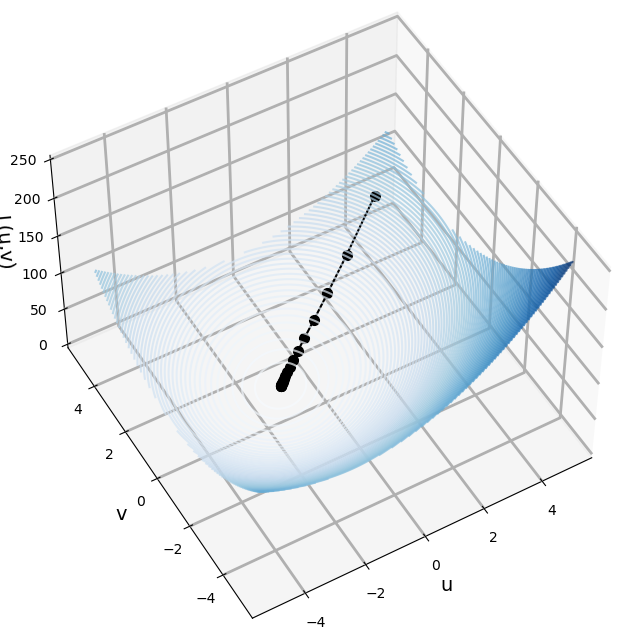

In [25]:
# fig04-10-1
WW1 = np.array(W1[:n_loop])
WW2 = np.array(W2[:n_loop])
ZZ = L(WW1, WW2)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.set_zlim(0, 250)
ax.set_xlabel('u', fontsize=14)
ax.set_ylabel('v', fontsize=14)
ax.set_zlabel('L(u,v)', fontsize=14)
ax.view_init(50, 240)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.contour3D(U, V, Z, 100, cmap='Blues', alpha=0.7)
ax.plot3D(WW1, WW2, ZZ, 'o-', c='k', alpha=1, markersize=7)
plt.show()

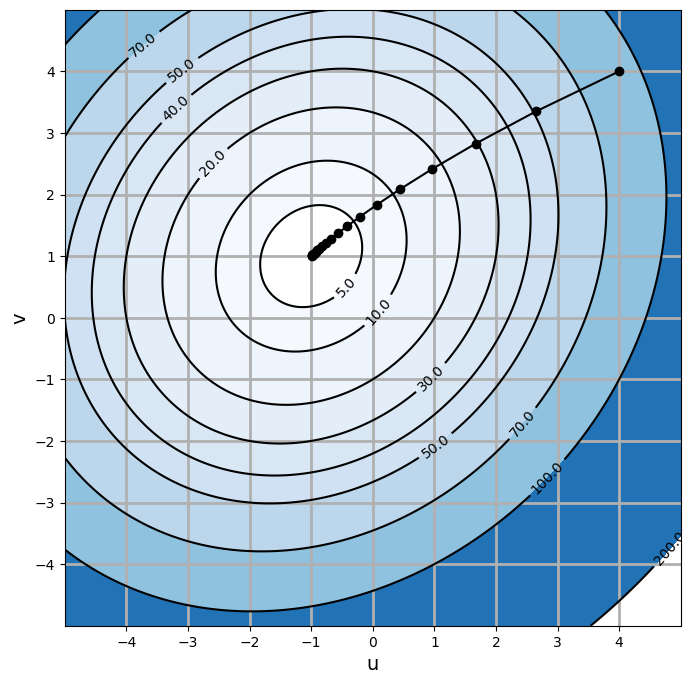

In [26]:
# fig04-10-2
plt.figure(figsize=(8, 8))
plt.contourf(U, V, Z, levels=[5, 10, 20, 30, 40,
             50, 70, 100, 200], cmap='Blues')
C = plt.contour(U, V, Z, levels=[5, 10, 20, 30,
                40, 50, 70, 100, 200], colors='k')
plt.clabel(C, inline=1, fontsize=10, fmt='%r')
plt.plot(W1, W2, '-o', c='k')
plt.gca().set_aspect('equal')
plt.xticks(range(-4, 5, 1))
plt.yticks(range(-4, 5, 1))
plt.xlabel('u', fontsize=14)
plt.ylabel('v', fontsize=14)
plt.grid(linewidth=2)
plt.show()

## 図 4-12


In [27]:
def f(x):
    return x**2


def diff(x):
    return 2*x

In [28]:
x = np.linspace(-2.5, 2.5, 101)
y = f(x)

In [29]:
a1 = 2
b1 = f(a1)
d1 = diff(a1) * 0.1
a2 = 1.5
b2 = f(a2)
d2 = diff(a2) * 0.1
a3 = 1
b3 = f(a3)
d3 = diff(a3) * 0.1
a4 = 0.5
b4 = f(a4)
d4 = diff(a4) * 0.1

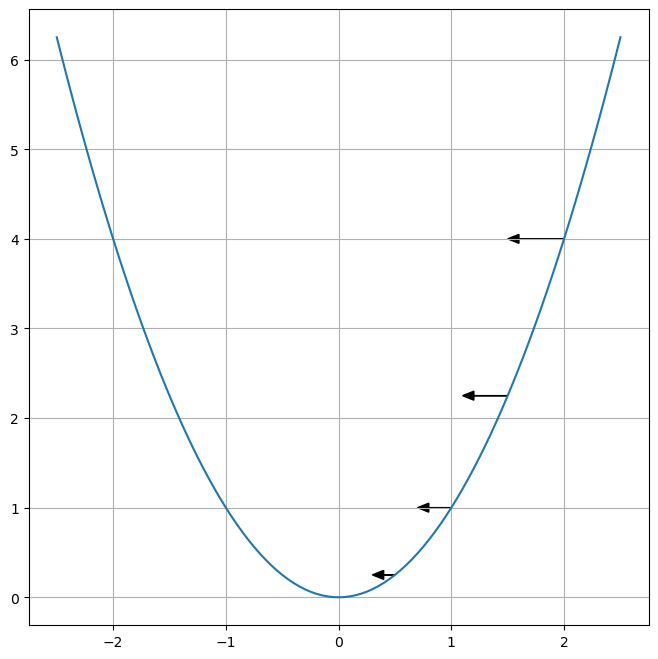

In [30]:
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.arrow(a1, b1, -d1, 0, head_width=0.1, head_length=0.1, color='k')
plt.arrow(a2, b2, -d2, 0, head_width=0.1, head_length=0.1, color='k')
plt.arrow(a3, b3, -d3, 0, head_width=0.1, head_length=0.1, color='k')
plt.arrow(a4, b4, -d4, 0, head_width=0.1, head_length=0.1, color='k')
plt.grid()
plt.show()

## 図 4-13


In [31]:
def L(u, v):
    return 3 * u**2 + 3 * v**2 - u*v + 7*u - 7*v + 10

In [32]:
def Lu(u, v):
    return 6 * u - v + 7

In [33]:
def Lv(u, v):
    return -u + 6 * v - 7

In [34]:
u = np.linspace(-5, 5, 11)
v = np.linspace(-5, 5, 11)
U, V = np.meshgrid(u, v)
Z = L(U, V)

In [35]:
Luu = Lu(U, V)
Lvv = Lv(U, V)

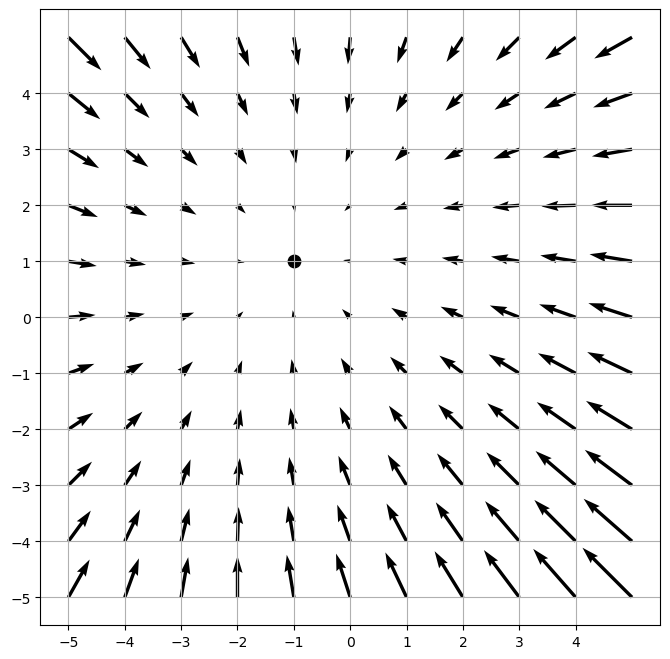

In [36]:
plt.figure(figsize=(8, 8))
plt.quiver(U, V, -Luu, -Lvv)
plt.xticks(np.arange(-5, 5, 1))
plt.yticks(np.arange(-5, 5, 1))
plt.scatter([-1], [1], s=80, c='k')
plt.grid()
plt.show()

## コラム


In [37]:
def f(x):
    return 3*x**4 + 4*x**3 - 12*x**2

In [38]:
def diff(x):
    return x**3 + x**2 - x

In [39]:
xx = np.linspace(-3, 2, 101)
yy = f(xx)

In [40]:
a1 = 0.5
a2 = -0.5

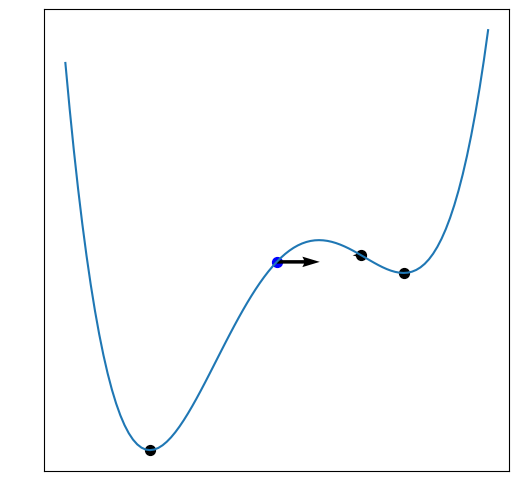

In [41]:
plt.figure(figsize=(6, 6))
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)
plt.plot(xx, yy)
plt.scatter([a1], [f(a1)], s=50, c='k', label='A')
plt.scatter([a2], [f(a2)], s=50, c='b', label='B')
plt.scatter([-2, 1], [f(-2), f(1)], s=50, c='k')
plt.quiver([a1, a2], [f(a1), f(a2)], [diff(a1), diff(a2)], [0, 0])
plt.show()